In [32]:
using CSV, DataFrames, CairoMakie, wgregseq

wgregseq.viz.default_makie!()

┌ Warning: Font 'Lato-Regular' not found. Defaulting to NotoSans...
└ @ wgregseq.viz ~/git/Reg-Seq-2/src/viz.jl:30


In [37]:
df = CSV.read(
    "./replicate_test/blrp/blrp-stats.txt", 
    DataFrame, 
    delim='\t',
    header=["growth_condition", "KST_sum", "KST_diff", "sigma"]
);
df.sigma = [parse.(Float64, split(df.sigma[i][2:end-1], ", ")) for i in 1:nrow(df)]

9-element Vector{Vector{Float64}}:
 [-0.15038980476950511, -1.136687209756929, -0.12086276653455168, -0.5290473713583415, 1.1828420051587325, 0.3775481748498208, 1.8406023671190281, 1.6461702899498738, 1.3570051134902221, 1.1313177343537368  …  -1.4819424607643823, -1.4819424607643534, -1.4819424607643703, 0.8178182901346924, 0.6119756255568763, 0.7643221748955337, 0.23265905598449982, -0.43880453622432514, -0.9906829982017886, 0.39220238457519596]
 [1.4271623753006988, 0.1990971931840861, 1.4080478492239563, 1.618183116560332, 1.7087761728225188, 1.0919576890345575, 0.8430048458575758, 1.4700627067730034, 1.1825206739542857, 0.7346405880100867  …  -0.10889745388896317, -0.09360744869001318, 0.8263497926539163, -0.169628036839253, -0.7278205165011555, -0.41163587266427526, 0.420316757150537, 0.7091516472616665, 1.810531540851902, 1.0225846374096914]
 [0.30542217320145737, -0.5760470460616613, 0.05638694294222451, 1.1127167392717454, 1.0278252212258896, 0.12347637647355454, 0.3986655087

In [38]:
sort!(df, [:KST_sum, :KST_diff], rev=true)

Row,growth_condition,KST_sum,KST_diff,sigma
,Int64,Float64,Float64,Array…
1,1,0.435532,0.161975,"[1.67774, 1.44861, 0.801538, 1.14752, -0.119022, -0.700866, 1.28422, 1.90968, -1.24016, -1.12568 … -0.0352308, 0.0457171, 0.155424, 0.292148, 1.55223, 1.51807, 1.4194, 0.850642, 0.905213, 1.12129]"
2,10,0.415519,0.207392,"[1.47148, 1.49673, 0.806636, 1.82978, 1.56926, 0.45519, 0.0529978, 1.63628, -0.935715, -0.923106 … 0.606976, 0.488635, 0.190487, 1.84556, 1.29437, -0.294134, 1.41891, 1.5393, 1.49672, 1.66129]"
3,3,0.401494,0.146367,"[0.64792, 1.39286, 2.01892, 1.8926, 1.04638, 1.07586, 0.420231, 0.827548, 0.838391, 0.886635 … -0.242118, -0.386634, -0.14837, 1.09464, 0.444047, -0.385472, -0.590118, 1.38493, 1.48808, 0.90693]"
4,2,0.395013,0.159481,"[1.42716, 0.199097, 1.40805, 1.61818, 1.70878, 1.09196, 0.843005, 1.47006, 1.18252, 0.734641 … -0.108897, -0.0936074, 0.82635, -0.169628, -0.727821, -0.411636, 0.420317, 0.709152, 1.81053, 1.02258]"
5,5,0.316228,0.0921266,"[0.305422, -0.576047, 0.0563869, 1.11272, 1.02783, 0.123476, 0.398666, -0.567899, -0.400791, -0.488 … 0.899055, 0.76671, 1.75577, -0.443963, -0.7014, -0.691799, 1.30775, 0.715884, 1.15433, 1.22168]"
6,6,0.315203,0.14543,"[1.39938, -0.0778941, 0.0386612, 0.00834589, 0.226484, -0.204374, 1.22188, 1.33956, 0.260553, -0.729443 … -1.06238, -1.16564, -1.10563, 1.56392, 0.0874204, -0.148294, 1.63545, 1.24302, 1.58966, 1.9499]"
7,9,0.257911,0.103519,"[0.950156, 1.63318, 0.578847, 1.29456, 0.505717, -0.0664282, 0.489456, 1.58132, -0.434529, -0.402821 … -1.22887, -1.27839, -1.2694, 1.19256, 1.64306, 0.868001, 0.61783, 1.40673, 1.3812, 0.116282]"
8,4,0.226873,0.170241,"[1.05811, 1.51521, 0.599608, 0.822251, 1.08609, 0.896902, 1.19171, 1.28872, 1.65375, 0.452157 … -0.435951, -0.196919, 0.729735, -0.0267457, -0.0353886, -0.405381, 0.153576, -0.222353, 1.28594, 1.63302]"
9,7,0.168519,0.13957,"[-0.15039, -1.13669, -0.120863, -0.529047, 1.18284, 0.377548, 1.8406, 1.64617, 1.35701, 1.13132 … -1.48194, -1.48194, -1.48194, 0.817818, 0.611976, 0.764322, 0.232659, -0.438805, -0.990683, 0.392202]"


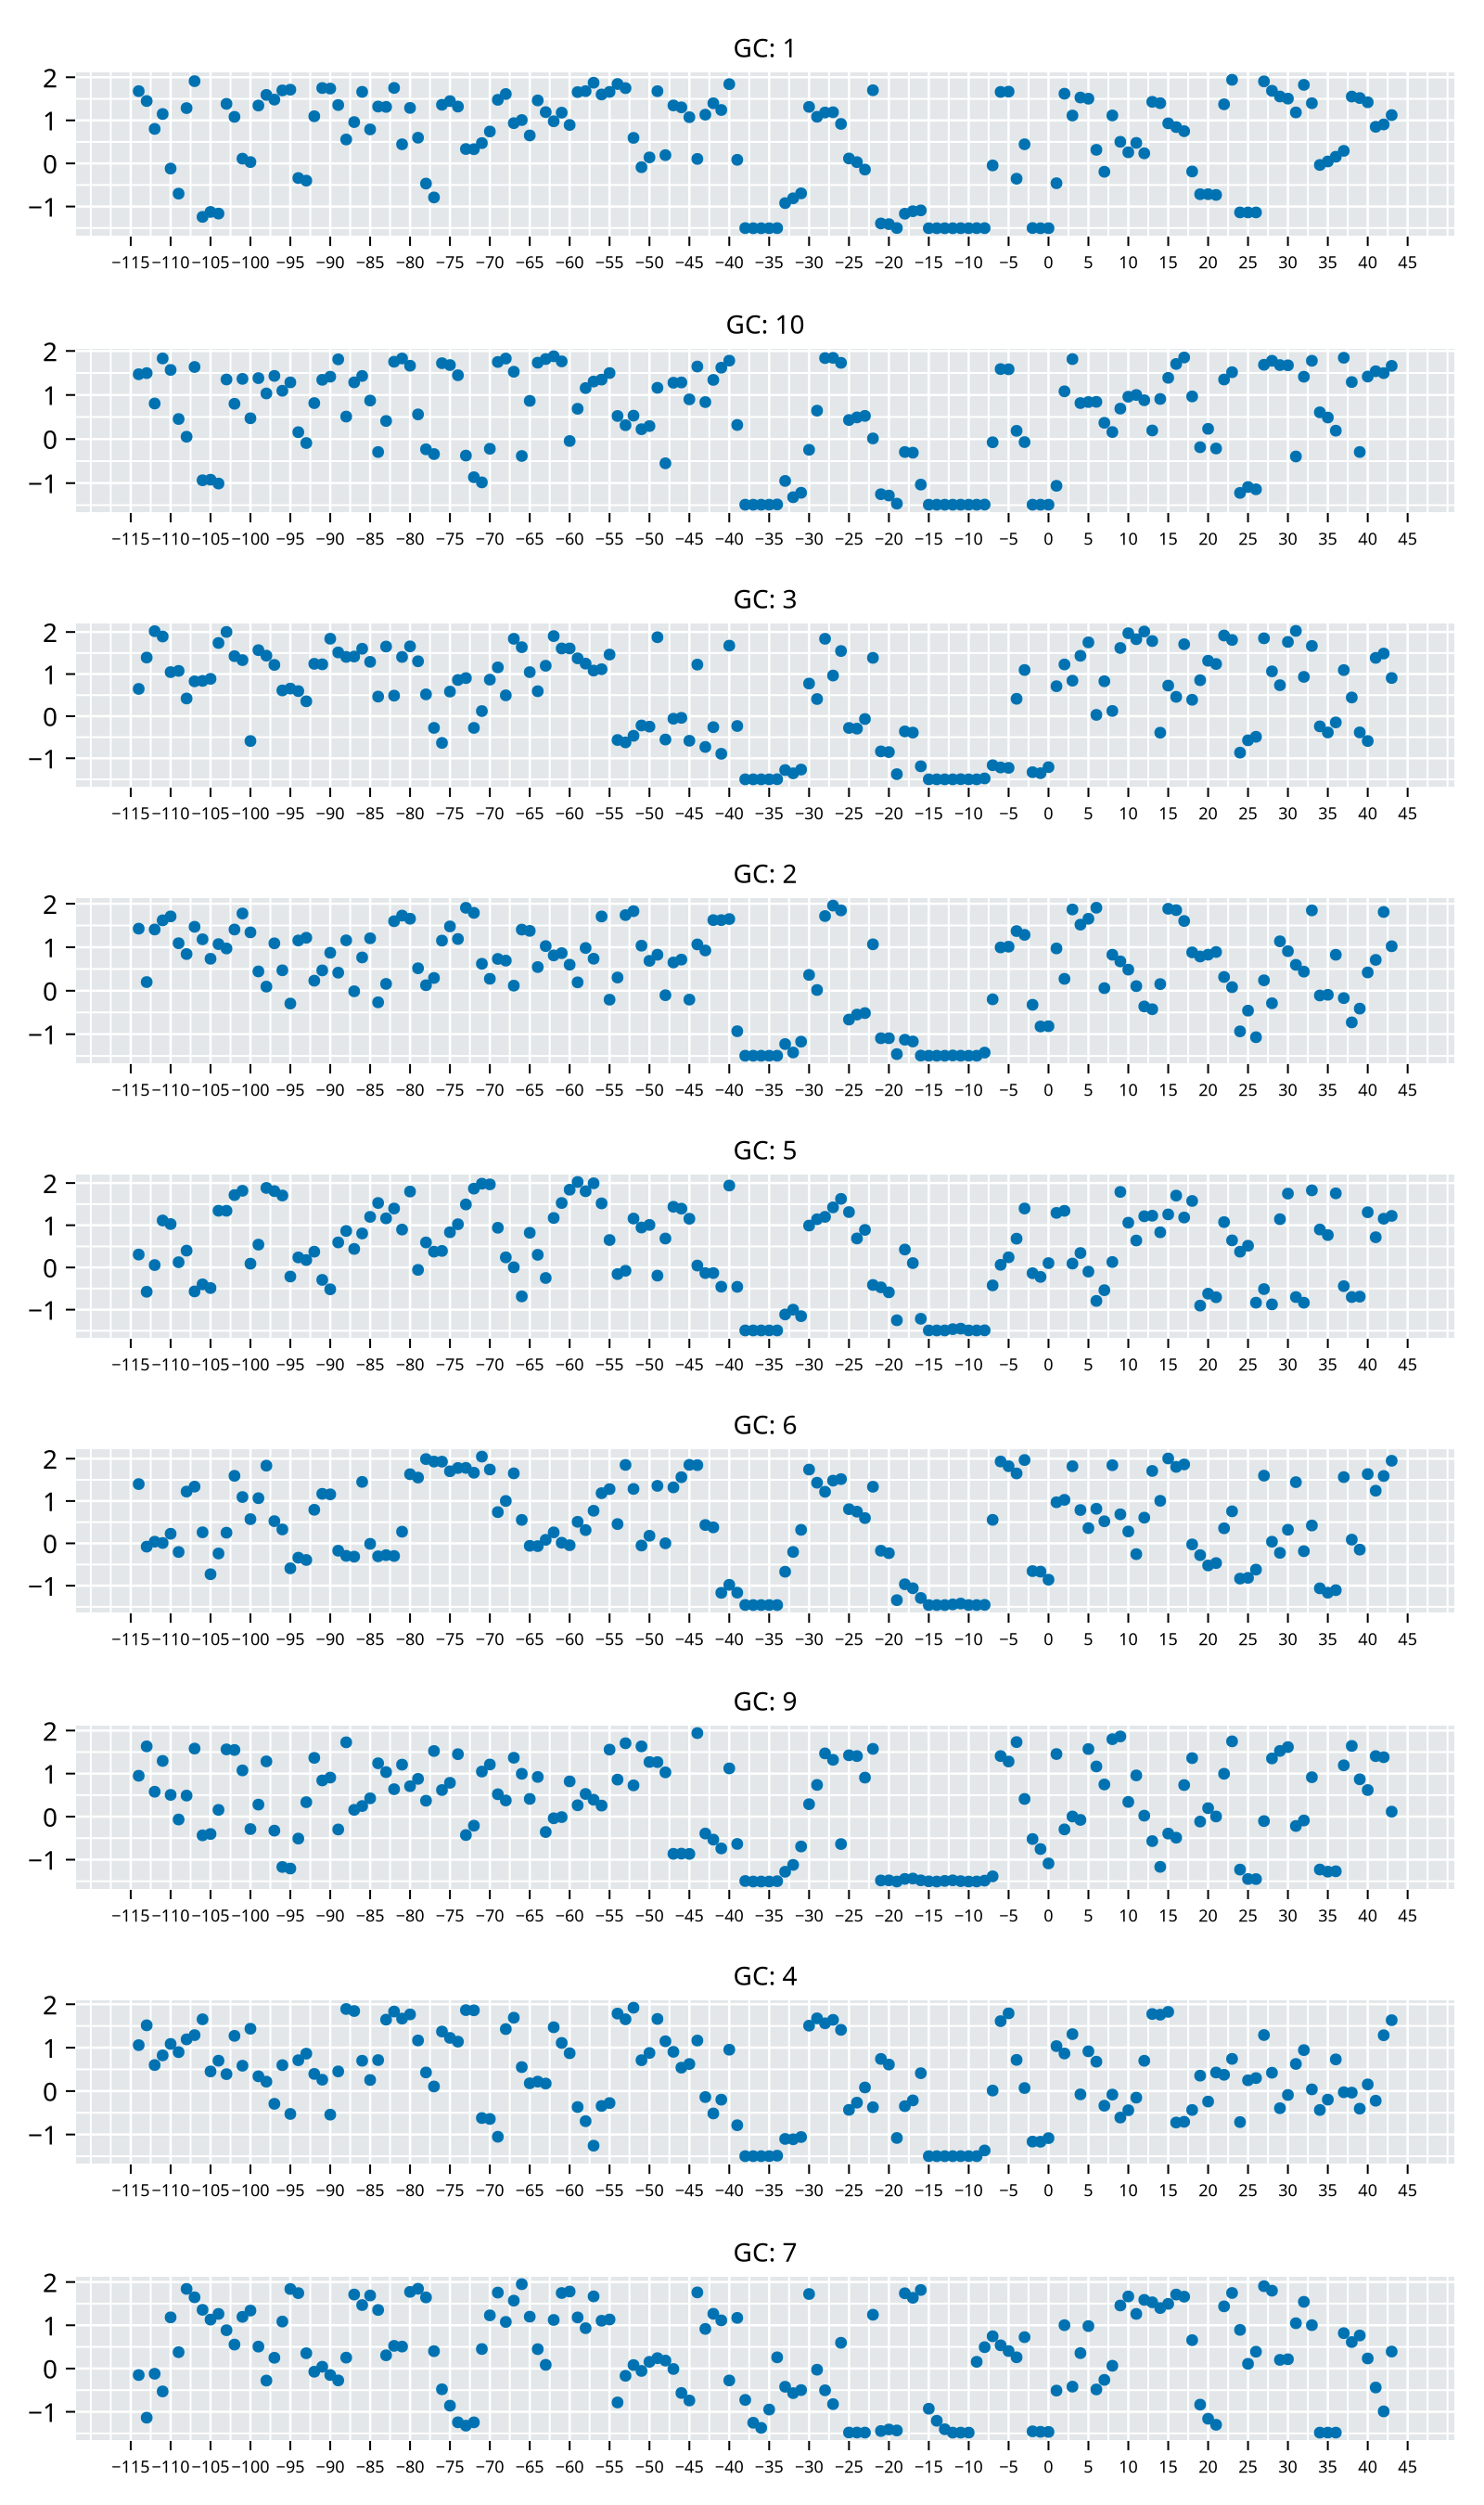

In [39]:
fig = Figure(size=(800, 150*nrow(df)))

for i in 1:nrow(df)
    ax = Axis(fig[i, 1], title="GC: $(df[i, :growth_condition])", xticks=-115:5:45, xticklabelsize=9)
    
    scatter!(ax, -114:43, df.sigma[i])
end

fig